In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import numpy as np
from sklearn.manifold import TSNE

In [2]:
trn_reg = pd.read_csv("../data/trn.reg.csv.gz", compression='gzip', low_memory=False)
tst_reg = pd.read_csv("../data/tst.reg.csv.gz", compression='gzip', low_memory=False)

In [3]:
trn_reg_X = trn_reg.drop(["SMILES", "LogS", "name", "set", "ref"], axis=1)
tst_reg_X = tst_reg.drop(["SMILES", "LogS", "name", "set"], axis=1)
trn_reg_y = trn_reg["LogS"]
tst_reg_y = tst_reg["LogS"]

In [4]:
cols = trn_reg_X.columns[(trn_reg_X > 9e+15).any()]
trn_reg_X.drop(cols, axis = 1, inplace = True)

UMAP

In [5]:
reducer = umap.UMAP(
    n_neighbors=50,
    min_dist=0.3,
    n_epochs=100,
    random_state=512146,
    n_jobs=1
).fit(trn_reg_X, y=trn_reg_y)
embedding = reducer.transform(trn_reg_X)
embedding = pd.DataFrame(embedding, columns=["UMAP 1", "UMAP 2"])
embedding["Solubility"] = trn_reg_y
embedding["Set"] = trn_reg["set"]

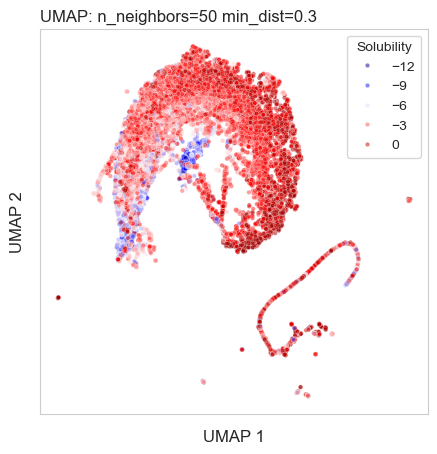

In [6]:
_, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(embedding, x="UMAP 1", y="UMAP 2", hue="Solubility", s=10, palette="seismic", alpha=0.5)
ax.set_xlabel("UMAP 1", fontsize=12)
ax.set_ylabel("UMAP 2", fontsize=12)
ax.text(0, 1.05,
        f"UMAP: n_neighbors={reducer.n_neighbors} min_dist={reducer.min_dist}",
        fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
plt.show()

t-SNE

In [7]:
reducer = TSNE(
    n_components=2,
    perplexity=25,
    random_state=512146
)
embedding = reducer.fit_transform(trn_reg_X)
embedding = pd.DataFrame(embedding, columns=["t-SNE 1", "t-SNE 2"])
embedding["Solubility"] = trn_reg_y

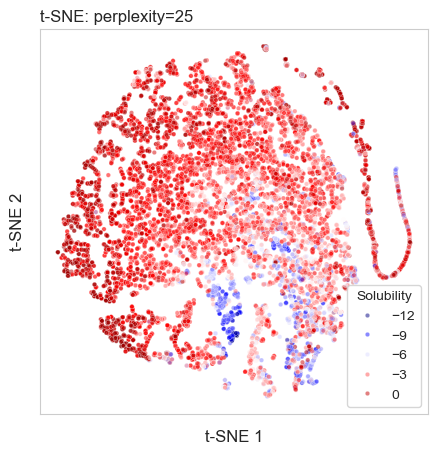

In [8]:
_, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(embedding, x="t-SNE 1", y="t-SNE 2", hue="Solubility", s=10, palette="seismic", alpha=0.5)
ax.set_xlabel("t-SNE 1", fontsize=12)
ax.set_ylabel("t-SNE 2", fontsize=12)
ax.text(0, 1.05,
        f"t-SNE: perplexity={reducer.perplexity}",
        fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
plt.show()